# Phase-4-project
![Alt text](<timepic.png>)

## Moringa Phase 4 Project Submission

#### GROUP 4:

- Student name: Kenneth Karanja
- Student name: Pete Njagi
- Student name: James Koli
- Student name: Tom Mwabire
- Student name: Paul Mwangi
- Student name: Lee Ndung'u
- Student name: Edwin Mwenda

Scheduled project review date/time: April 12th 2024


# Forecasting Housing Market Trends for Real Estate Investment Strategy
![Alt text](<zillow.png>)

#### Important Project Files:

1. index.ipynb (Main Jupyter document)
2. Presentation.pdf (Presentation)
3. zillow_data.csv (Main Data)
4. Project Report Pdf

## 0. Business Use Case and Project Overview 


`Our client is a Kenyan real estate investment firm aiming` to provide Kenyans and the diaspora with accessible investment opportunities in the US housing market, with a particular emphasis on low-cost housing. This initiative seeks to leverage data-driven insights to identify and recommend regions in the USA where investment in affordable housing would be most beneficial, both for rental and purchase purposes, within a short to mid-term investment horizon.

For this project, our dataset originates from `Zillow`, renowned for its comprehensive coverage of the US real estate market. It includes median home prices across numerous metropolitan and non-metropolitan regions, reflecting a broad spectrum of the housing market. Specifically, the dataset encapsulates housing price data for thousands of regions across the US, tracking changes from `April 1996` through to the latest available data point in `April 2018`.

Given the unique focus of our Kenyan clients, our analysis will concentrate on identifying US regions that offer the most promising opportunities for investment in low-cost housing. This will include filtering the dataset to spotlight areas that align with the financial capabilities and investment goals of our clientele. Additionally, we will tailor our data processing and analysis to exclude periods of significant market instability, such as the 2008 housing market crash, to ensure our predictions remain relevant and accurate for the current investment climate.

Our goal is to empower our clients with the knowledge to make informed decisions, offering them a gateway to viable and lucrative investment opportunities in the US real estate market, specifically within the affordable housing segment. Through meticulous analysis and forecasting, we aim to highlight regions that not only promise good returns but also contribute to building a stable investment portfolio for Kenyans looking to invest abroad

# Step 1: Load the Data/Filtering for Chosen Zipcodes

### 1.1 Importing the Necessary Libraries and packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
file_path = 'zillow_data.csv'
df = pd.read_csv(file_path)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [4]:
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

In [5]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


### Data Analysis Conclusion:

It contains 14,723 entries and 272 columns. Here's a brief overview of its structure and the types of information included:

`Geographical Identifiers`: Includes `RegionID`, RegionName, City, State, Metro (metropolitan area), and CountyName.

`SizeRank`: A ranking of regions based on size, presumably related to the market size or the number of properties.

`Time Series Data`: The bulk of the dataset consists of time-series data spanning from April 1996 (1996-04) through April 2018 (2018-04). These columns seem to represent housing prices or values for each region over time, likely on a monthly basis given the naming convention (e.g., 2017-07 for July 2017).

`Data Types`: The dataset combines floating point numbers (for the housing values), integers (for identifiers like RegionID and rankings like SizeRank), and object types (for textual data such as City and State).

The time series nature of the data suggests it could be used for analyzing trends in housing prices over time, including both long-term trends and more granular monthly fluctuations.

Additionally, the geographical identifiers allow for regional analysis and comparisons across different areas, states, and metropolitan regions

# Step 2: Data Preprocessing

*   **Rows**: The dataset consists of 14,723 entries, each corresponding to a different region.
    
*   **Columns**: There are 272 columns in total. Here's a breakdown of some key columns:
    
    *   **RegionID**: A unique identifier for each region.
        
    *   **RegionName**: The ZIP code of the region.
        
    *   **City**: The city in which the region is located.
        
    *   **State**: The state in which the region is located.
        
    *   **Metro**: The metropolitan area the region belongs to.
        
    *   **CountyName**: The name of the county the region is in.
        
    *   **SizeRank**: A ranking of the region based on its size.
        
    *   Monthly columns from **1996-04** to **2018-04**: These columns represent the median home value for each region for every month starting from April 1996 to April 2018.

In [7]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index(['Metro', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12',
       ...
       '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06'],
      dtype='object', length=220)

In [8]:

print(f'The number of duplicates within the dataset is : {df.duplicated().sum()}')

The number of duplicates within the dataset is : 0


In [9]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [10]:
df['Metro'].fillna('None', inplace=True)
df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [11]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01',
       ...
       '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06'],
      dtype='object', length=219)

In [12]:
for column in df.iloc[:,7:]:
    if df[column].isna().sum() > 0:
        df[column].fillna(df[column].mean(), inplace=True)

df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [13]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index([], dtype='object')

In [14]:
df['ROI'] = ((df['2018-04'] - df['1996-04']) / df['1996-04']) * 100
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,208.378217
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,36.529487
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,56.796578
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,162.397109
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,57.179819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,217700,218600,218500,218100,216400,213100,209800,209200,209300,121.247357
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,208400,212200,215200,214300,213100,213700,218300,222700,225800,143.581446
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,122800,124600,126700,128800,130600,131700,132500,133000,133400,133.625219
14721,93733,81225,Mount Crested Butte,CO,None,Gunnison,14722,191100.0,192400.0,193700.0,...,671200,682400,695600,695500,694700,706400,705300,681500,664400,247.671376


In [15]:
df.isna().sum()/len(df)*100

RegionID      0.0
RegionName    0.0
City          0.0
State         0.0
Metro         0.0
             ... 
2018-01       0.0
2018-02       0.0
2018-03       0.0
2018-04       0.0
ROI           0.0
Length: 273, dtype: float64

# Melting our specific data

In [62]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index(['Metro', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12',
       ...
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', 'ROI'],
      dtype='object', length=221)

In [ ]:
df['ROI'] = ((df['2018-04'] - df['1996-04']) / df['1996-04']) * 100
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,PriceCategory,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,High Price,208.378217
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,High Price,36.529487
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,High Price,56.796578
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,High Price,162.397109
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,Low Price,57.179819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,218600,218500,218100,216400,213100,209800,209200,209300,Middle Price,121.247357
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,212200,215200,214300,213100,213700,218300,222700,225800,Middle Price,143.581446
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,124600,126700,128800,130600,131700,132500,133000,133400,Middle Price,133.625219
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,682400,695600,695500,694700,706400,705300,681500,664400,High Price,247.671376


In [ ]:
def filter_and_melt(data,cut_off):
    new_df = data.loc[data['ROI'] >= cut_off]
    melted_subset = pd.melt(new_df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'ROI', 'PriceCategory'], var_name='time')
    melted_subset['time'] = pd.to_datetime(melted_subset['time'], format='%Y-%m')
    melted_subset.groupby('time')
    melted_subset = melted_subset.loc[melted_subset['time'] > '2000-01'] 
    melted_subset = melted_subset.loc[melted_subset['value'] < 200000]
    
    return melted_subset

In [ ]:
#cut_off = 125
#melted_subset = filter_and_melt(df,cut_off)

In [ ]:
melted_subset.head(100)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,ROI,PriceCategory,time,value
270574,61807,10467,New York,NY,New York,Bronx,7,173.315893,High Price,2000-02-01,176400.0
270578,71831,32162,The Villages,FL,The Villages,Sumter,12,149.306931,Middle Price,2000-02-01,123800.0
270581,96107,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,16,304.065574,High Price,2000-02-01,184300.0
270582,84646,60647,Chicago,IL,Chicago,Cook,17,283.211084,High Price,2000-02-01,169300.0
270583,74242,37211,Nashville,TN,Nashville,Davidson,18,169.867211,Middle Price,2000-02-01,115900.0
...,...,...,...,...,...,...,...,...,...,...,...
270744,97435,93727,Fresno,CA,Fresno,Fresno,335,146.407767,Middle Price,2000-02-01,112000.0
270745,66787,21122,Pasadena,MD,Baltimore,Anne Arundel,337,131.981637,Middle Price,2000-02-01,145700.0
270746,97319,93536,Lancaster,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,338,161.687827,High Price,2000-02-01,162500.0
270747,97318,93535,Lancaster,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,339,182.678984,Middle Price,2000-02-01,93500.0


c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


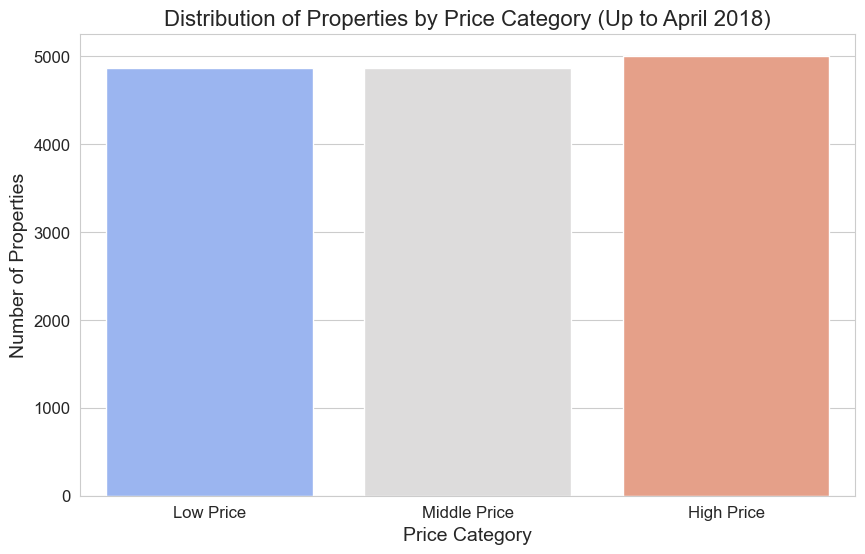

In [71]:
# Define the price categories based on quantiles
quantiles = df['2018-04'].quantile([0.25, 0.75])

# Categorize each property
df['PriceCategory'] = pd.cut(df['2018-04'],
                             bins=[df['2018-04'].min(), quantiles[0.25], quantiles[0.75], df['2018-04'].max()],
                             labels=['Low Price', 'Middle Price', 'High Price'],
                             include_lowest=True)

# To verify our categorization, let's display the count of properties in each category
price_category_counts = df['PriceCategory'].value_counts()

price_category_counts


PriceCategory
Middle Price    7359
Low Price       3684
High Price      3680
Name: count, dtype: int64

# Step 3: EDA and Visualization

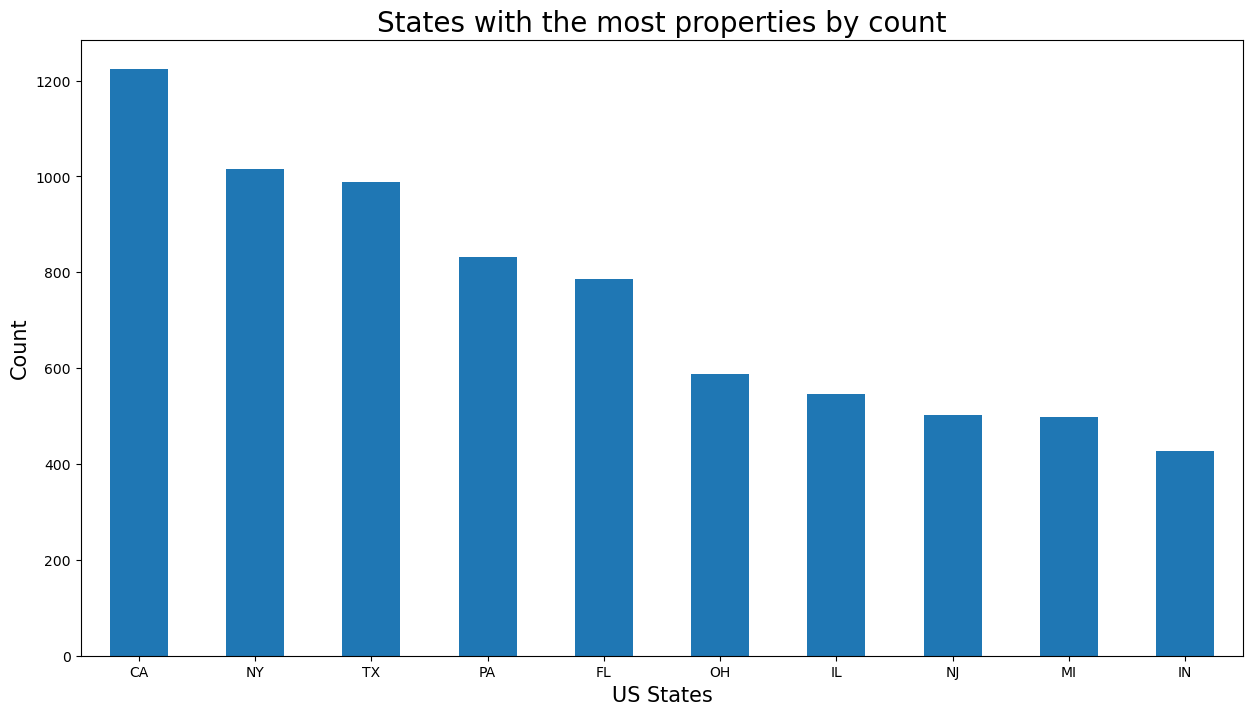

In [16]:
# plotting the most popular states in the dataset
plt.figure(figsize=(15,8))
df.State.value_counts()[:10].plot(kind="bar")
plt.xlabel("US States",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=0)
plt.title("States with the most properties by count",fontsize=20);

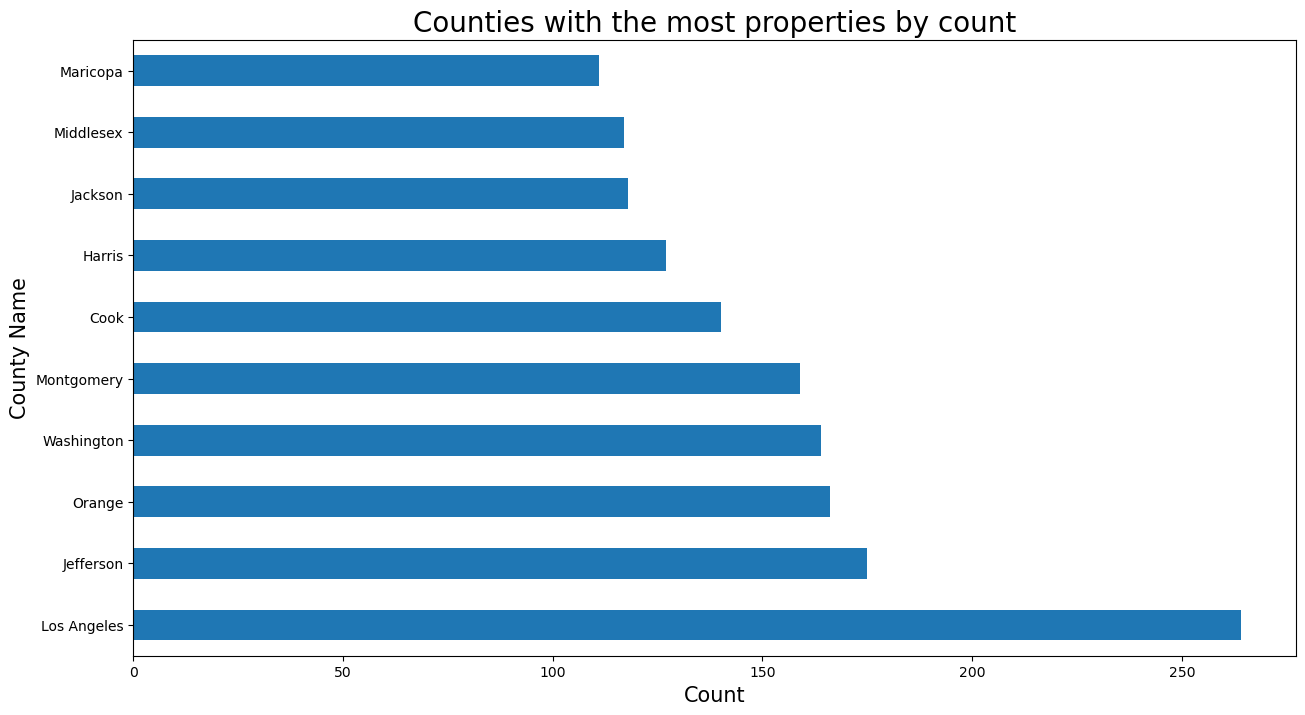

In [17]:
#Plotting the most popular counties in the dataset
plt.figure(figsize=(15,8))
df.CountyName.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Counties with the most properties by count",fontsize=20);


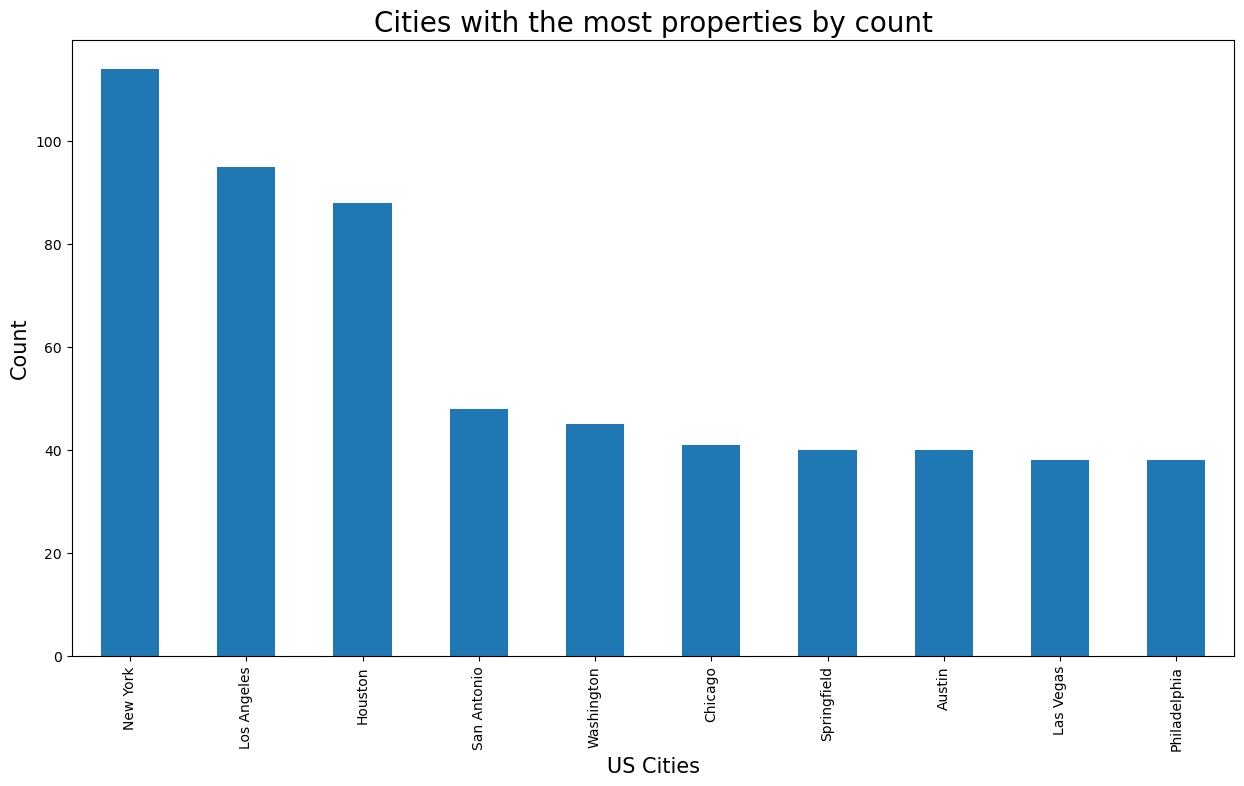

In [18]:
# plotting the most popular cities in the dataset
plt.figure(figsize=(15,8))
df.City.value_counts()[:10].plot(kind="bar")
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Cities with the most properties by count",fontsize=20);

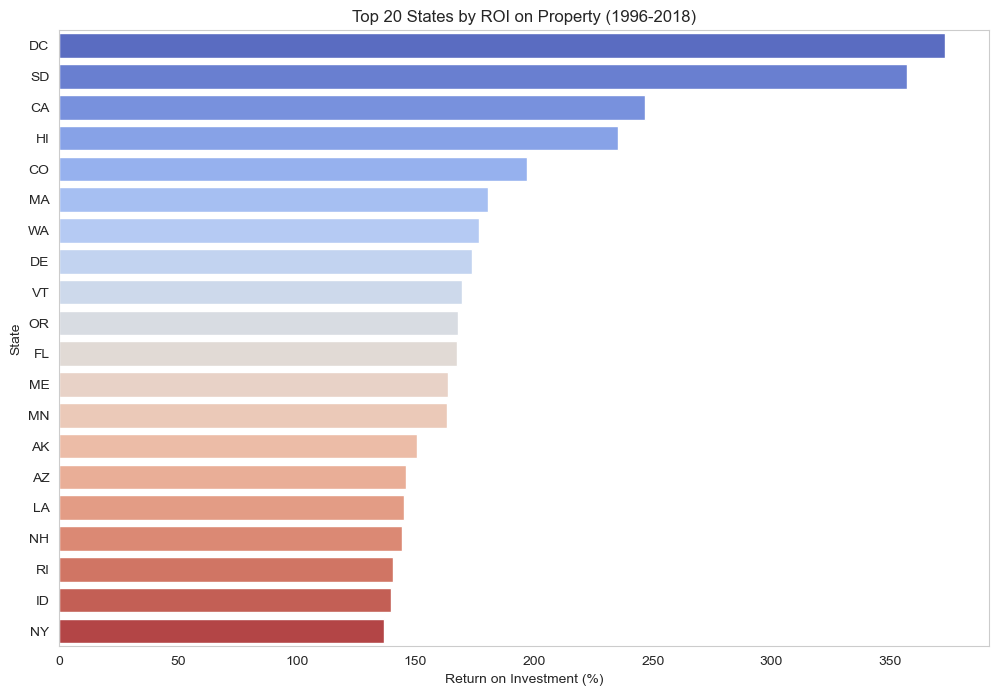

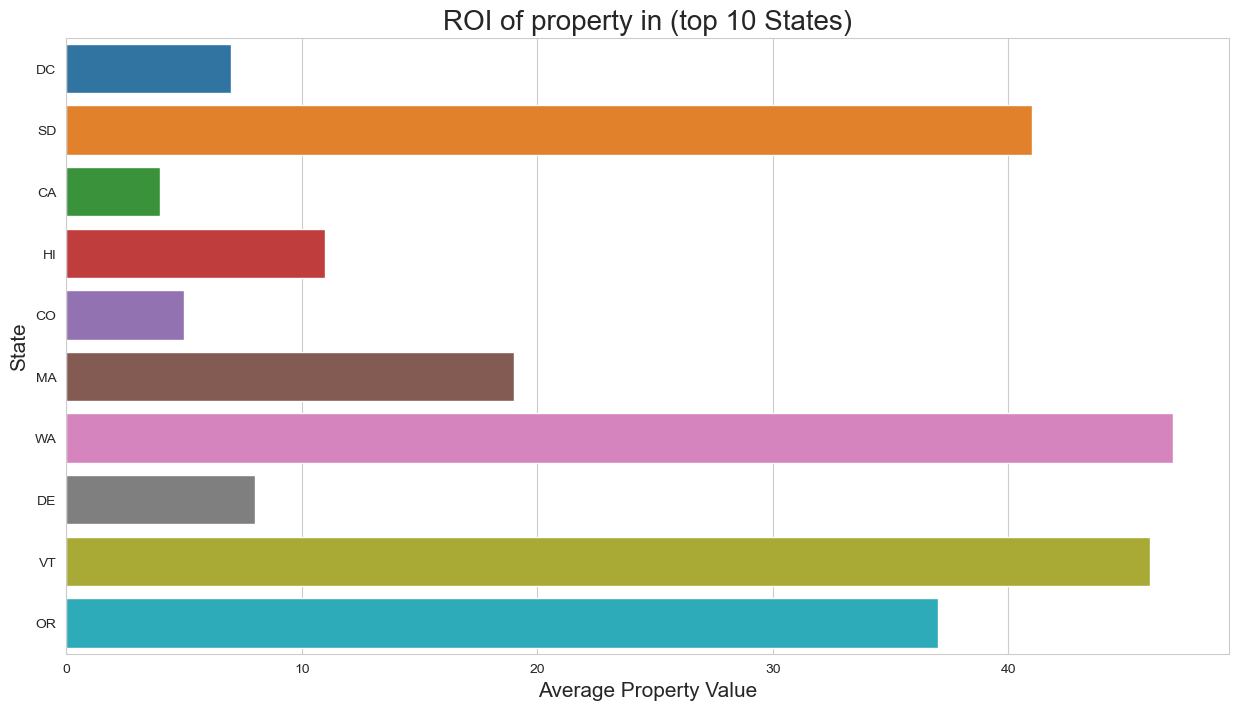

In [53]:
import pandas as pd

# Load the data
file_path = 'zillow_data.csv'
zillow_data = pd.read_csv(file_path)


# Extract the first and last monthly data columns for calculation
initial_month = zillow_data.columns[7]  # The first monthly data column
final_month = zillow_data.columns[-1]   # The last monthly data column

# Calculate ROI
zillow_data['ROI'] = ((zillow_data[final_month] - zillow_data[initial_month]) / zillow_data[initial_month]) * 100

# Group by state and calculate the mean ROI for each state
state_roi = zillow_data.groupby('State')['ROI'].mean().reset_index()

# Sort the states by ROI and select the top 20
top_20_states_roi = state_roi.sort_values(by='ROI', ascending=False).head(20)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='ROI', y='State', data=top_20_states_roi, palette='coolwarm')
plt.title('Top 20 States by ROI on Property (1996-2018)')
plt.xlabel('Return on Investment (%)')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

# Specify the numeric columns for aggregation
numeric_columns = ['ROI']

# Calculate the average profit margin for each city using numeric columns
df_avg_value = df.groupby('State')[numeric_columns].mean().reset_index()

# Sort the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('ROI', ascending=False)

# Select the top 10 cities by average profit margin
top_states = df_sorted_states['State'].head(10)

# Filter the DataFrame to include only t
# create a bar plot of city vs. profit margin
fig,ax = plt.subplots(figsize=(15,8))
sns_plot = sns.barplot(x=top_states.index, y=top_states, ax=ax)

# set the title and axis labels
ax.set_title('ROI of property in (top 10 States)',fontsize=20)
ax.set_xlabel('Average Property Value',fontsize=15)
ax.set_ylabel('State',fontsize=15)

# display the plot
plt.show();

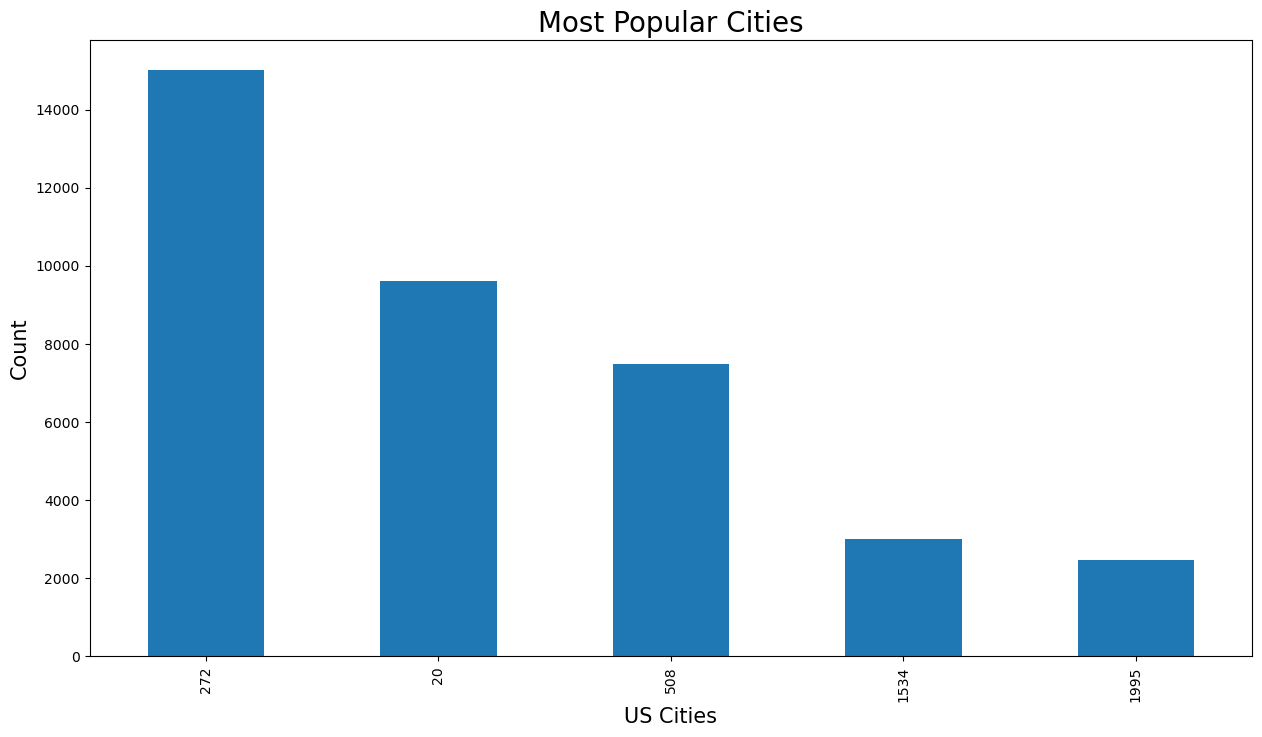

In [20]:
#error
plt.figure(figsize=(15,8))
df.ROI.nlargest()[:10].plot(kind="bar")
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Most Popular Cities",fontsize=20);

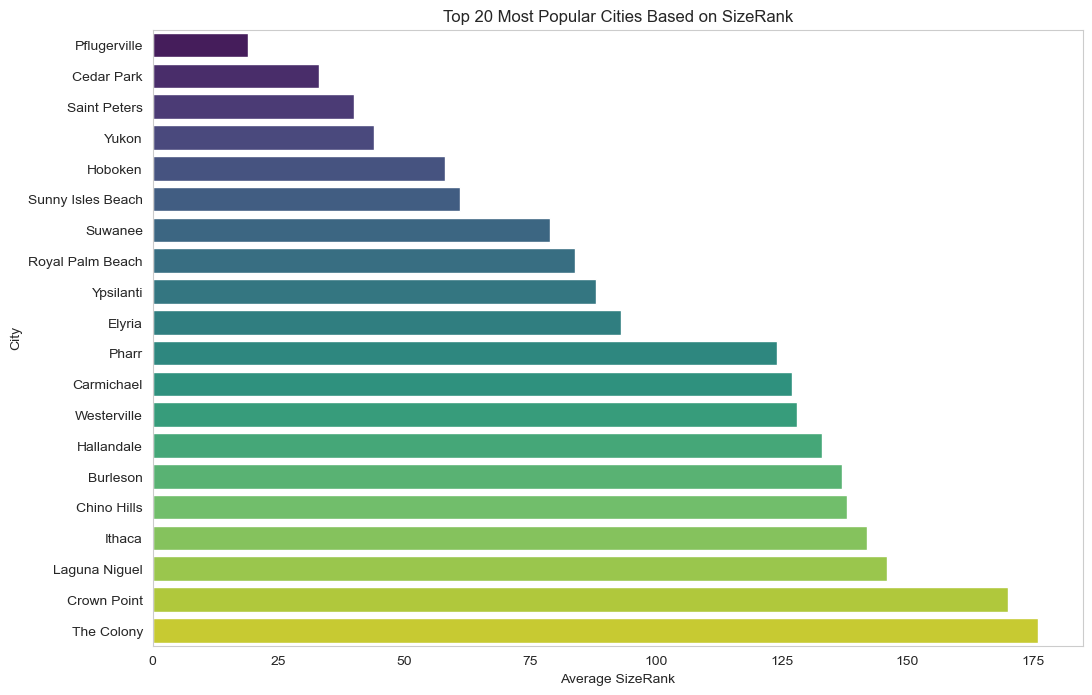

In [54]:
# Group by city and calculate the mean SizeRank for each city
city_rank = zillow_data.groupby('City')['SizeRank'].mean().reset_index()

# Sort the cities by SizeRank and select the top 20
top_20_cities = city_rank.sort_values(by='SizeRank').head(20)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='SizeRank', y='City', data=top_20_cities, palette='viridis')
plt.title('Top 20 Most Popular Cities Based on SizeRank')
plt.xlabel('Average SizeRank')
plt.ylabel('City')
plt.grid(axis='x')
plt.show()


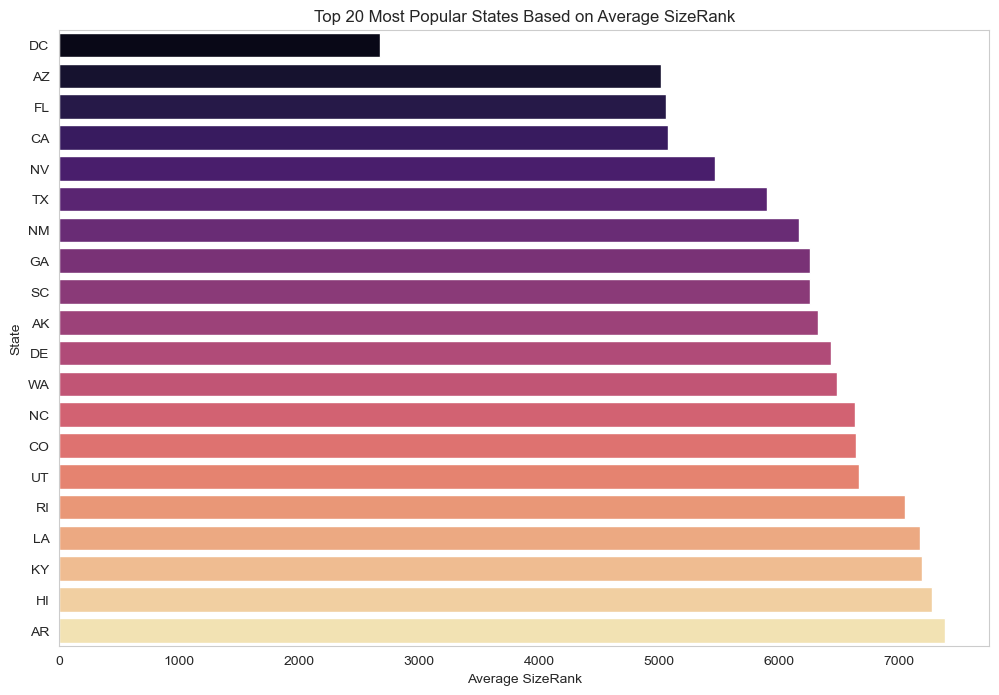

In [57]:
# Similar to cities, we'll use the "SizeRank" as a proxy for the popularity of states.
# We'll group by state and calculate the mean SizeRank for each state to determine their popularity.

# Group by state and calculate the mean SizeRank for each state
state_rank = zillow_data.groupby('State')['SizeRank'].mean().reset_index()

# Sort the states by SizeRank to determine popularity
top_20_states = state_rank.sort_values(by='SizeRank').head(20)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='SizeRank', y='State', data=top_20_states, palette='magma')
plt.title('Top 20 Most Popular States Based on Average SizeRank')
plt.xlabel('Average SizeRank')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()


## Plotting for outliers

In [67]:
#plot_outliers(zillow_data)

In [63]:
def bivariate_analysis(data, x_column, y_column, top_n=10):

    top_categories = data[x_column].value_counts().nlargest(top_n).index
    data_top = data[data[x_column].isin(top_categories)]

    plt.figure(figsize=(10, 8))
    for category in top_categories:
        category_data = data_top[data_top[x_column] == category]
        plt.scatter(category_data[x_column], category_data[y_column], label=category)

    plt.title(f'Scatter plot of top 10 {x_column} against {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=90)
    plt.legend(title=x_column)
plt.show()



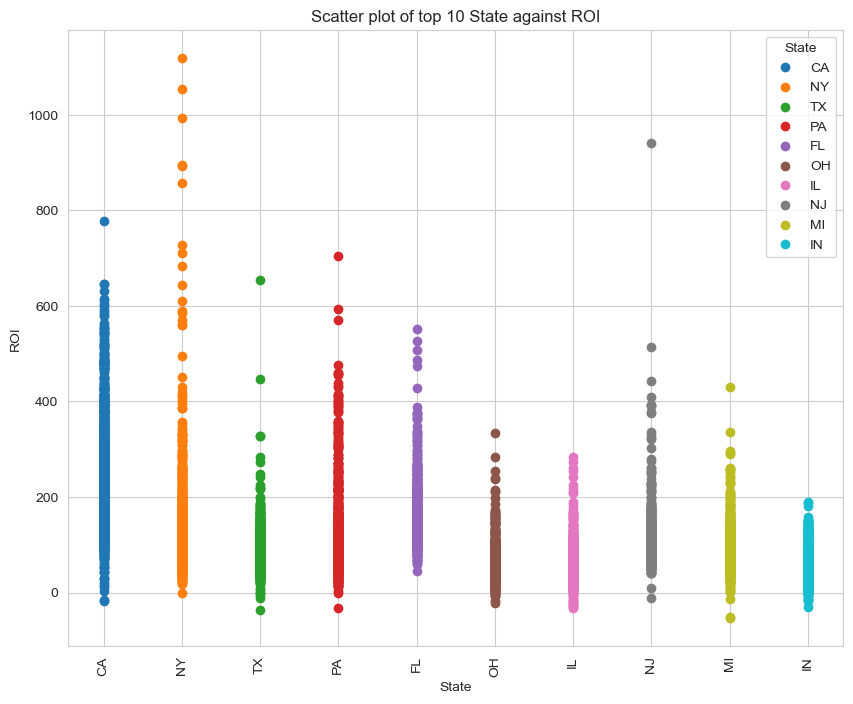

In [65]:
bivariate_analysis(zillow_data, 'State', 'ROI')

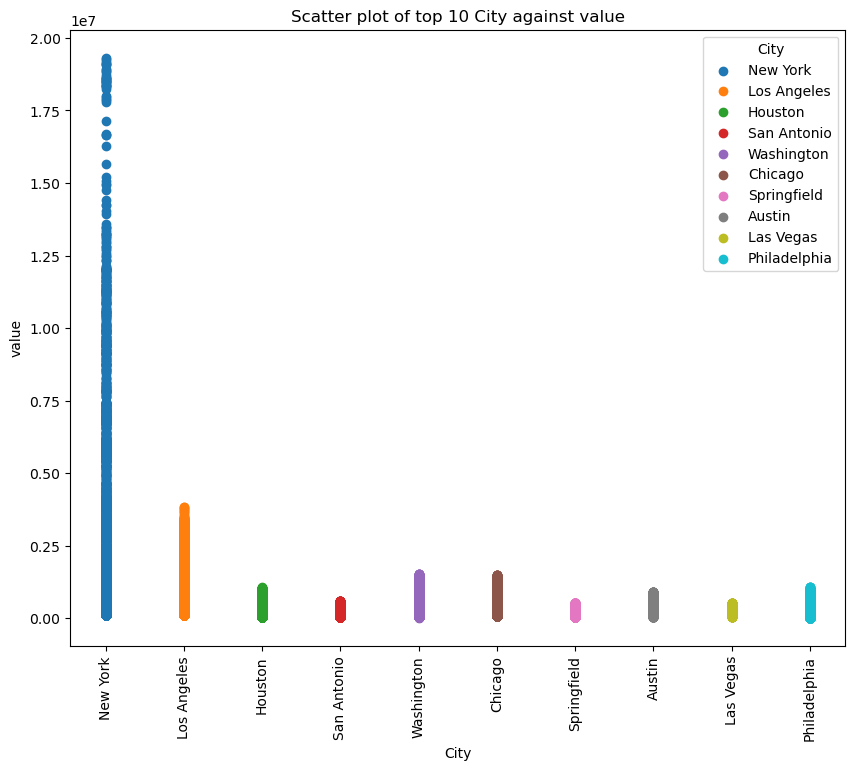

In [30]:
bivariate_analysis(melted_data, 'City', 'value')

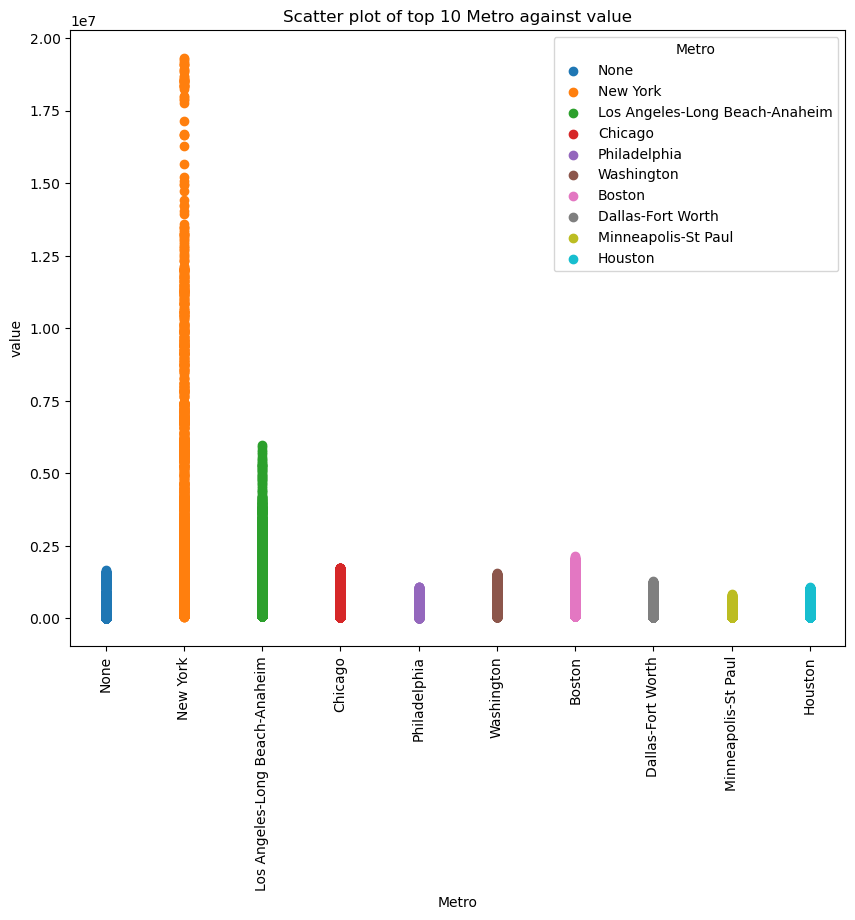

In [31]:
bivariate_analysis(melted_data, 'Metro', 'value')

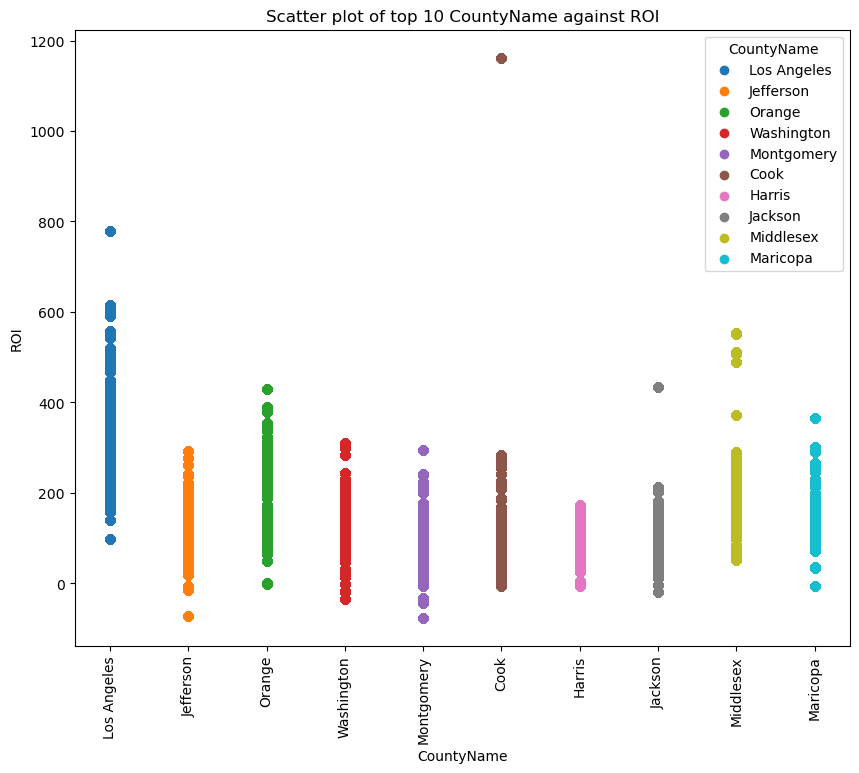

In [32]:
bivariate_analysis(melted_data, 'CountyName', 'ROI')

# Step 5: ARIMA & Modeling

### 2.3 Filtering by Price

We need to filter down our raw dataframe to only look at metro area where 'NY' is designated for the StateName column.

`Low price`: Properties priced at or below the 25th percentile.

`Middle price`: Properties priced between the 25th and 75th percentiles.

`High price`: Properties priced above the 75th percentile.

In [70]:
# Define the price categories based on quantiles
quantiles = df['2018-04'].quantile([0.25, 0.75])

# Categorize each property
df['PriceCategory'] = pd.cut(df['2018-04'],
                             bins=[df['2018-04'].min(), quantiles[0.25], quantiles[0.75], df['2018-04'].max()],
                             labels=['Low Price', 'Middle Price', 'High Price'],
                             include_lowest=True)

# To verify our categorization, let's display the count of properties in each category
price_category_counts = df['PriceCategory'].value_counts()

price_category_counts


PriceCategory
Middle Price    7359
Low Price       3684
High Price      3680
Name: count, dtype: int64

In [ ]:
num_data = melted_data[['ROI', 'value', 'SizeRank']]
correlation_matrix = num_data.corr()
correlation_matrix

melted_data[['ROI', 'SizeRank', 'value', 'RegionName', 'RegionID']].corr()

,ROI,value
ROI,1.000000,0.510702
value,0.510702,1.000000


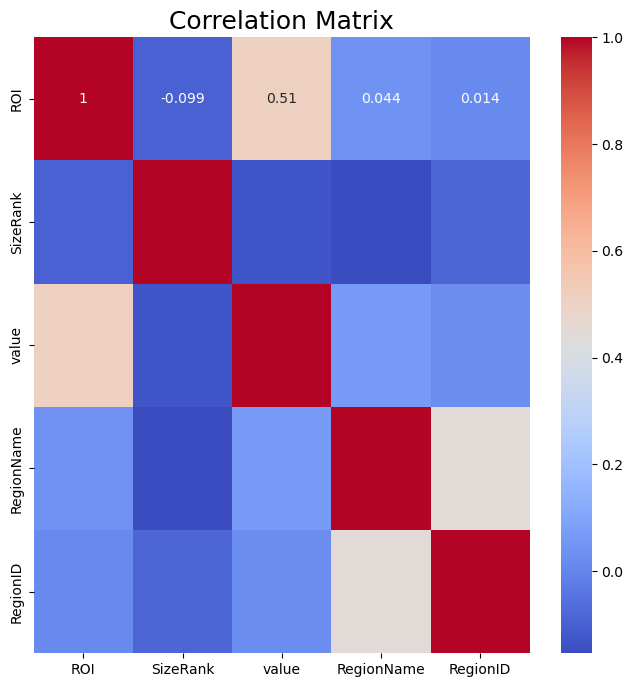

In [ ]:
corr_matrix = melted_data[['ROI', 'SizeRank', 'value', 'RegionName', 'RegionID']].corr()
fig, ax = plt.subplots(figsize=(8,8))

# Set the figure size to 12 inches by 12 inches
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show();

In [42]:
time_series = melted_data['value']
time_series.head()

time
1996-04-01    334200.0
1996-04-01    235700.0
1996-04-01    210400.0
1996-04-01    498100.0
1996-04-01     77300.0
Name: value, dtype: float64

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

(array([ 8035.,  9496., 10957., 12418., 13879., 15340., 16801., 18262.]),
 [Text(8035.0, 0, '1992'),
  Text(9496.0, 0, '1996'),
  Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020')])

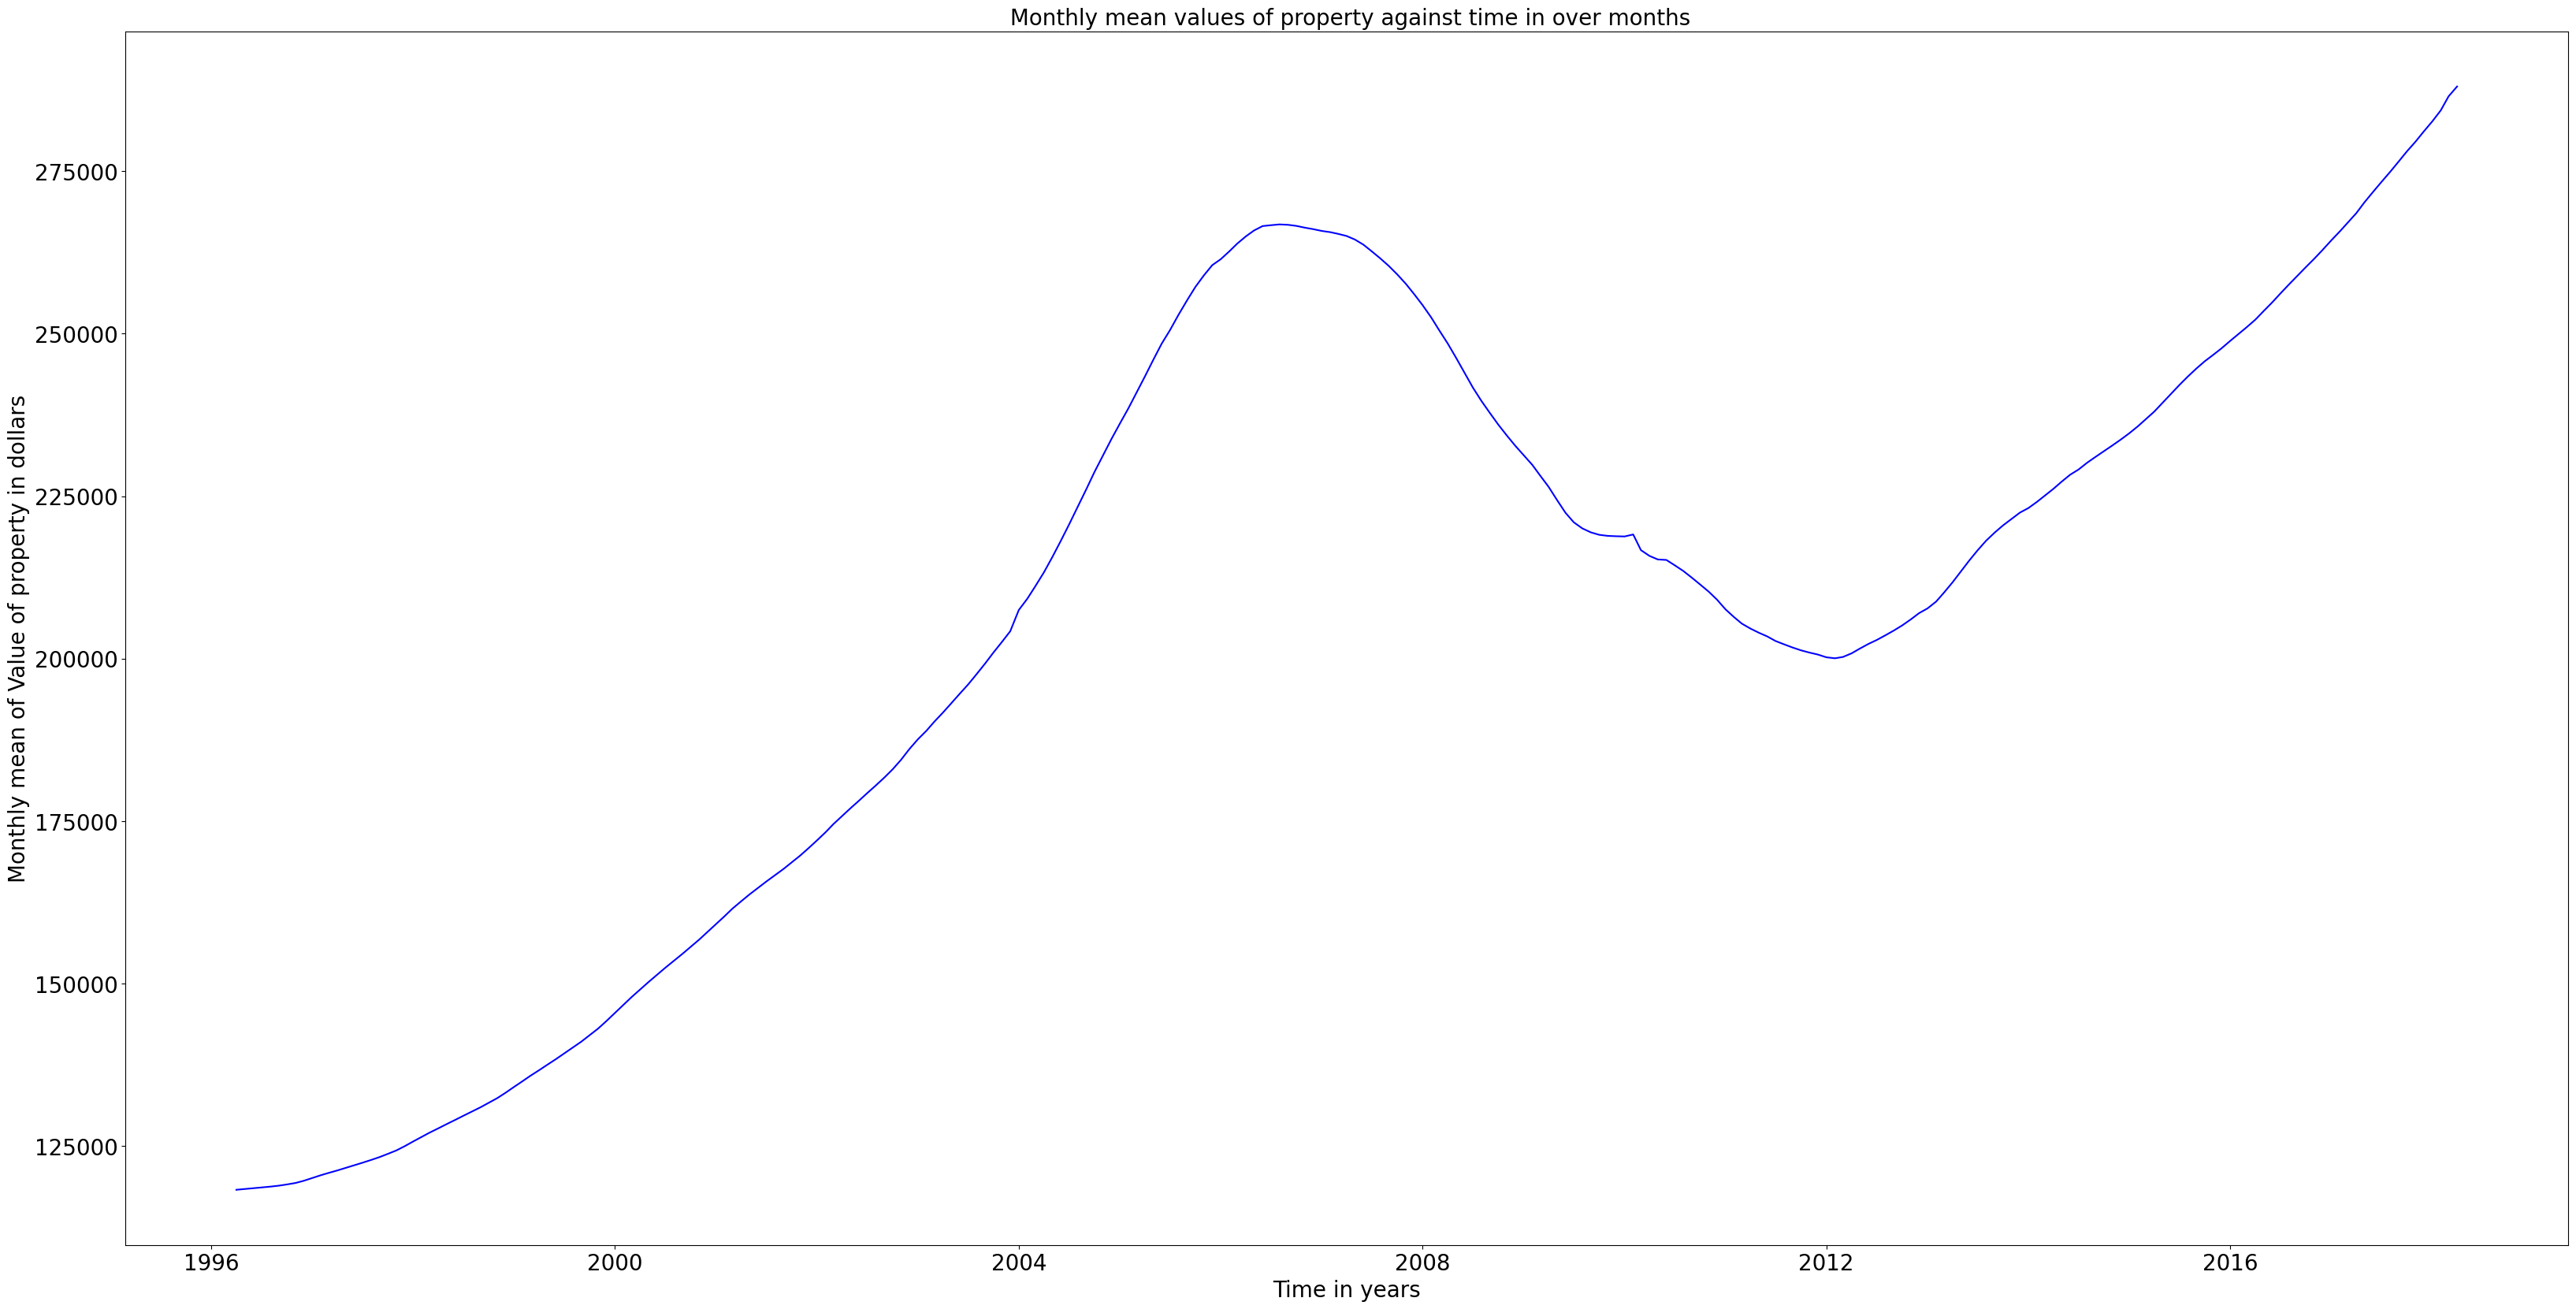

In [49]:
time_series_monthly_value = time_series.resample('MS').mean()

plt.subplots(figsize=(40, 20))
sns.lineplot(data=time_series_monthly_value,color='blue')
plt.title(' Monthly mean values of property against time in over months', fontsize=20)
plt.ylabel('Monthly mean of Value of property in dollars', fontsize=20)
plt.xlabel('Time in years', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Step 6: Interpreting Results

`Low Price: 3,684 properties`

`Middle Price: 7,359 properties`

`High Price: 3,680 properties`

c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


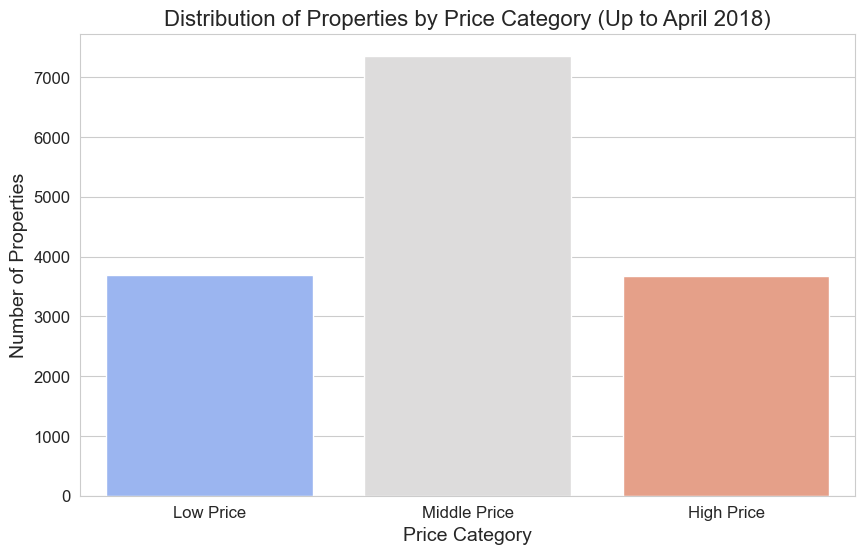

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of properties across price categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PriceCategory', order=['Low Price', 'Middle Price', 'High Price'], palette='coolwarm')
plt.title('Distribution of Properties by Price Category (Up to April 2018)', fontsize=16)
plt.xlabel('Price Category', fontsize=14)
plt.ylabel('Number of Properties', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [16]:
low_price_homes = df[df['PriceCategory'] == 'Low Price']

top_100_low_price_homes = low_price_homes.sort_values(by='2018-04').head(100)

# Display the top 100 low price homes
top_100_low_price_homes

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,PriceCategory
12584,89482,72331,Earle,AR,Memphis,Crittenden,12585,18600.0,18700.0,18800.0,...,14500,14700,14800,14500,14300,14100,13900,13800,13800,Low Price
4149,79247,48506,Flint,MI,Flint,Genesee,4150,46000.0,46400.0,46800.0,...,21200,21800,22100,22200,22200,21600,21200,21300,21500,Low Price
11917,86105,63556,Milan,MO,NaN,Sullivan,11918,NaN,NaN,NaN,...,21000,21600,21800,21700,21800,22100,22200,22200,22200,Low Price
4381,79244,48503,Flint,MI,Flint,Genesee,4382,47100.0,47200.0,47400.0,...,18900,19700,20600,21000,20800,20500,20800,21700,22800,Low Price
14385,76354,42410,Earlington,KY,Madisonville,Hopkins,14386,15900.0,15900.0,15900.0,...,24600,25000,25000,24600,24400,24200,24100,24400,24500,Low Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14310,85616,62665,Meredosia,IL,Jacksonville,Morgan,14311,33800.0,34100.0,34300.0,...,45500,45500,45800,46300,46600,46800,47100,47500,47700,Low Price
11221,71934,32324,Chattahoochee,FL,Tallahassee,Gadsden,11222,28100.0,28200.0,28300.0,...,44900,44800,44500,44300,44200,44000,44700,46400,47700,Low Price
13863,79377,48770,Whittemore,MI,NaN,Iosco,13864,23900.0,23900.0,23900.0,...,48000,47500,47300,47800,48500,48800,48300,47800,47700,Low Price
14088,86209,63837,Clarkton,MO,Kennett,Dunklin,14089,NaN,NaN,NaN,...,45100,46100,46800,46500,46500,46800,47000,47300,47800,Low Price
